# Machine Learning Fundamentals - Lecture 02

This is the Jupyter notebook for Lecture 02 of the Machine Learning Fundamentals
course.

## Part 1: Load and clean dataset

In [1]:
# Import the required libraries using the commonly use short names (pd, sns, ...)
import numpy as np
import pandas as pd
import seaborn as sns

# The Path object from pathlib allows us to easily build paths in an
# OS-independent fashion
from pathlib import Path

# Load the required scikit-learn classes and functions
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set a nicer style for Seaborn plots
sns.set_style("darkgrid")

In [2]:
# Load the dataset (note the use of the Path object)
df = pd.read_csv(Path("..", "datasets", "Pokemon.csv"))

# Let's take a look at the top rows in the table
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# Let's get some information about the columns in this table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
# See standard descriptive statistics about each column
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
# It's not good practice to have column names with spaces and other non-standard
# characters, so let's fix this by renaming the columns to standard names
df.rename(columns={
    "Type 1" : "Type1",
    "Type 2" : "Type2",
    "Sp. Atk" : "SpAtk",
    "Sp. Def" : "SpDef",
}, inplace=True)

df.head()

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
# Do we have missing values in any of the columns?
na_counts = df.isna().sum()

na_counts

#               0
Name            0
Type1           0
Type2         386
Total           0
HP              0
Attack          0
Defense         0
SpAtk           0
SpDef           0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
# We seem to have missing values in the "Type2" column; let's replace them with
# the string "None"
df["Type2"] = df["Type2"].fillna("None")

In [8]:
# Since primary and secondary types are essentially categories (and not just
# strings / objects), we can convert these columns to the category type
df["Type1"] = df["Type1"].astype("category")
df["Type2"] = df["Type2"].astype("category")

# Let's look at the column information now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        800 non-null    object  
 2   Type1       800 non-null    category
 3   Type2       800 non-null    category
 4   Total       800 non-null    int64   
 5   HP          800 non-null    int64   
 6   Attack      800 non-null    int64   
 7   Defense     800 non-null    int64   
 8   SpAtk       800 non-null    int64   
 9   SpDef       800 non-null    int64   
 10  Speed       800 non-null    int64   
 11  Generation  800 non-null    int64   
 12  Legendary   800 non-null    bool    
dtypes: bool(1), category(2), int64(9), object(1)
memory usage: 66.3+ KB


## Part 2: Classifying legendary and non-legendary Pokémons with a decision tree classifier

In [9]:
# Get X matrix and y vector

# Let's use all features except the Total, which can be considered redundant
# since it's the total of the other features
features = ["HP", "Attack", "Defense", "SpAtk", "SpDef", "Speed"]

# Get only the specified features
df_X = df[features]

# Our labels will be the legendary status
y = df["Legendary"]

In [10]:
# Generally, we need to center and scale feature data before applying any ML
# algorithm. The StandardScaler class, with its default options, centers and
# scales each feature so that it has zero mean and standard deviation = 1
ss = StandardScaler()

# Since the Pokémon feature data has very similar dimensions, scaling is not so
# critical. On the other hand, the Decision Tree classifier we'll use next is
# more easily interpretable if we keep the features in their original format.
# Therefore, change the following variable to True in order to perform scaling
# (which should generally be the case).
do_scale = False

if do_scale:
    X = ss.fit_transform(df_X)
else:
    X = df_X.to_numpy() # The .to_numpy() is not strictly necessary here (ask me in class why I put it here)

In [11]:
# Let's split our data into training (80%) and test (20%) sets
# Change the random_state parameter do split data in different ways
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create a decision tree classifier with maximum depth set to 3
dtClf = DecisionTreeClassifier(max_depth=3)

# Let's train the classifier with the training data (we do that with the .fit() method)
dtClf.fit(X_train, y_train)

# Let's make a prediction about the legendary status according to the features in the test set
y_pred = dtClf.predict(X_test)

In [13]:
# Let's see how accurate our prediction was

# Remember that accuracy is the number of correct predictions over the total
# number of predictions
comp = y_pred == y_test
acc1 = sum(comp) / len(comp)
print(f"Accuracy (by hand)                 : {acc1}")

# Scikit-learn allows provides a function to determine accuracy
acc2 = accuracy_score(y_pred, y_test)
print(f"Accuracy (sklearn function)        : {acc2}")

# If we don't need the predicted results and are only interested in the
# accuracy score, we can predict() and get the accuracy in one go
acc3 = dtClf.score(X_test, y_test)
print(f"Accuracy (directly from classifier): {acc3}")

Accuracy (by hand)                 : 0.95625
Accuracy (sklearn function)        : 0.95625
Accuracy (directly from classifier): 0.95625


In [14]:
# Decision trees are a very intuitive ML method, so let's take a look at the
# generated tree itself

# First, by printing a text representation of the tree
print(export_text(dtClf, feature_names=features, decimals=2, show_weights=False))

|--- SpAtk <= 118.00
|   |--- SpDef <= 99.50
|   |   |--- Speed <= 170.00
|   |   |   |--- class: False
|   |   |--- Speed >  170.00
|   |   |   |--- class: True
|   |--- SpDef >  99.50
|   |   |--- Speed <= 83.00
|   |   |   |--- class: False
|   |   |--- Speed >  83.00
|   |   |   |--- class: False
|--- SpAtk >  118.00
|   |--- Attack <= 82.50
|   |   |--- class: False
|   |--- Attack >  82.50
|   |   |--- HP <= 97.50
|   |   |   |--- class: False
|   |   |--- HP >  97.50
|   |   |   |--- class: True



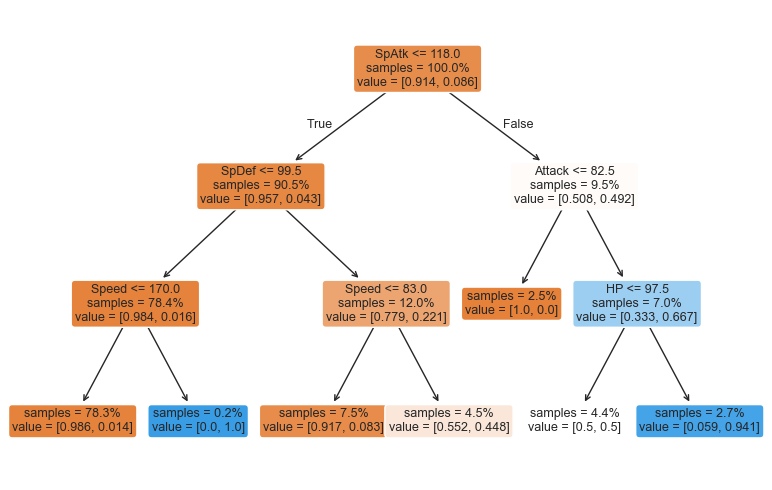

In [15]:

# Second, by creating an actual image of the tree

# Let's instantiate an empty figure
fig, ax = plt.subplots(figsize=(8, 5))

# And plot the tree on that figure
plot_tree(
    dtClf,
    feature_names=features,
    filled=True,
    rounded=True,
    impurity=False,
    proportion=True,
    fontsize=9,
    ax=ax)

fig.tight_layout()

## Part 3: Classifying legendary and non-legendary Pokémons with the $k$-Nearest Neighbors algorithm

In [16]:
# Let's follow the same approach as before, and instantiate a new kNN classifier
# which uses the 5 nearest neighbors to classify new data
knnClf = KNeighborsClassifier(n_neighbors=5)

# Let's train our kNN classifier; this is very fast, since it doesn't really
# train anything, it just keeps the training set internally in a list
knnClf.fit(X_train, y_train)

# This time we'll predict and get an accuracy score in one go using the .score()
# method, which internally calls the .predict() method + the accuracy_score()
# function
acc_knn = knnClf.score(X_test, y_test)

# Unlike most ML algorithms, k-NN has very fast training but relatively
# expensive prediction (inference), since each new test point must be compared
# against the stored training examples

print(f"Accuracy (directly from classifier): {acc_knn}")

Accuracy (directly from classifier): 0.9375


## Part 4: Homework

### Basic statistics of Pokémon features before and after scaling

In [17]:
print("Before Standard Scaling:")
df_X.describe().round(3)

Before Standard Scaling:


,HP,Attack,Defense,SpAtk,SpDef,Speed
count,800.000,800.000,800.000,800.000,800.000,800.000
mean,69.259,79.001,73.842,72.820,71.902,68.278
std,25.535,32.457,31.184,32.722,27.829,29.060
min,1.000,5.000,5.000,10.000,20.000,5.000
25%,50.000,55.000,50.000,49.750,50.000,45.000
50%,65.000,75.000,70.000,65.000,70.000,65.000
75%,80.000,100.000,90.000,95.000,90.000,90.000
max,255.000,190.000,230.000,194.000,230.000,180.000


In [18]:
# Let's first scale and center the Pokémon features
# Note that the .fit_transform() method returns a NumPy array, not a Pandas data frame
X_scaled = ss.fit_transform(df_X)

# Let's convert that NumPy array back into a data frame with the original columns
# (but with centered and scaled data)
df_X_scaled = pd.DataFrame(X_scaled, columns=df_X.columns)

# Now we can easily get the basic stats for the scaled data
# Note the mean and standard deviation for all features
print("After Standard Scaling:")
df_X_scaled.describe().round(3)

After Standard Scaling:


,HP,Attack,Defense,SpAtk,SpDef,Speed
count,800.000,800.000,800.000,800.000,800.000,800.000
mean,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.675,-2.281,-2.209,-1.921,-1.866,-2.179
25%,-0.755,-0.740,-0.765,-0.705,-0.788,-0.802
50%,-0.167,-0.123,-0.123,-0.239,-0.068,-0.113
75%,0.421,0.647,0.518,0.678,0.651,0.748
max,7.279,3.422,5.011,3.706,5.685,3.847


### Distribution of accuracy using different random seeds for 0.70/0.30 train/test splits 

In [19]:
# Let's use NumPy to create a new random number generator
# (Python also has one, but it's more basic)
rng = np.random.default_rng(123) # 123 is the seed for our random number generator

# Let's generate 1000 seeds to pass to the train/test split function
seeds = rng.integers(low=0, high=np.iinfo(np.int32).max, size=1000)

# We'll keep our accuracies in this list
# This will be a list of tuples, each tuple containing an accuracy and whether
# it came from the DT or kNN classifiers
acc_rng = []

# Let's loop through all seeds
for seed in seeds:

    # Perform a train/test split with the current seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Retrain the decision tree classifier with the training data coming from the new split
    # and put it in our accuracy list
    dtClf.fit(X_train, y_train)

    # Get the accuracy of the retrained decision tree for the test data coming from the new split
    acc_rng.append((dtClf.score(X_test, y_test), "DT"))

    # Retrain the kNN classifier with the training data coming from the new split
    knnClf.fit(X_train, y_train)

    # Get the accuracy of the retrained kNN for the test data coming from the new split
    # and put it in our accuracy list
    acc_rng.append((knnClf.score(X_test, y_test), "kNN"))

# We can now easily convert our list of tuples into a data frame
df_acc_rng = pd.DataFrame(acc_rng, columns=["Accuracy", "Model"])

In [20]:
# Let's check out the basic stats for the accuracy of both classifiers
df_acc_rng.groupby("Model").describe().round(3)

Accuracy                                                 
         count   mean    std    min    25%    50%    75%    max
Model                                                          
DT      1000.0  0.930  0.014  0.871  0.921  0.929  0.942  0.971
kNN     1000.0  0.939  0.014  0.888  0.929  0.942  0.950  0.979

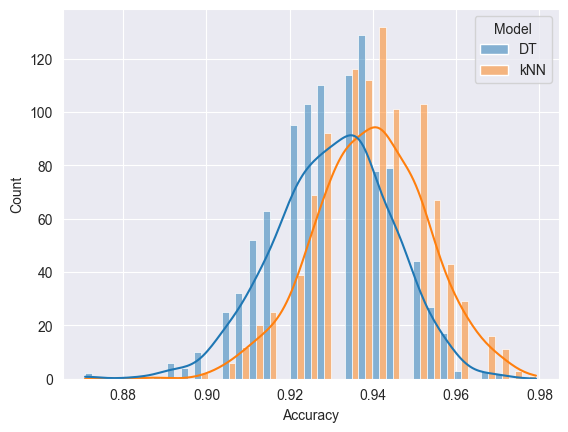

In [21]:
# Let's plot the distribution of the accuracies for both models using an histogram
# The kde parameter allows us to have a better idea of the continuous distribution
sns.histplot(df_acc_rng, x="Accuracy", hue="Model", multiple="dodge", kde=True);

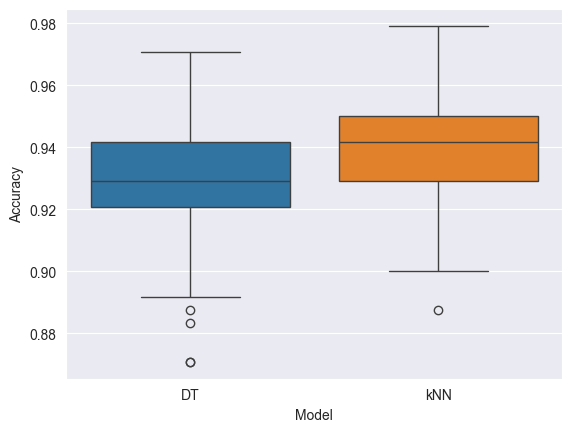

In [22]:
# And now the box plot
# Can you look at the histogram and the box plot and understand how they both
# depict the accuracy distribution in different ways?
sns.boxplot(df_acc_rng, x="Model", y="Accuracy", hue="Model");

## Extra: impact of train/test split on model accuracy

In [33]:
# We'll keep our accuracies and respective test split and model in this list
acc_split = []

# Get an array of test splits between 0.1/0.9, incrementing 0.001 each time
# (a total of 800 test split values)
test_splits = np.arange(0.1, 0.9, 0.001)

# The np.arange() function does not always round things perfectly, so let's make
# sure we have things rounded to 3 decimal places
# Comment the line below to see what changes in the df_pivot data frame in the
# next cell
test_splits = np.round(test_splits, 3)

# Loop through our test splits
for test_split in test_splits:

    # For each test split value, we'll split the data 10 different ways with
    # these 10 different random seeds
    for seed in [0, 10, 440, 543534, 234, 23455, 874, 9245, 145, 732343]:

        # Do the current split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=seed)

        # Train the decision tree classifier with the current split
        dtClf.fit(X_train, y_train)

        # Get the accuracy of the decision tree classifier on the current test
        # data and put it in our list (together with the split value and model)
        acc_split.append((dtClf.score(X_test, y_test), test_split, "DT"))

        # Train the k-nearest neighbors classifier with the current split
        knnClf.fit(X_train, y_train)

        # Get the accuracy of the k-nearest neighbors classifier on the current test
        # data and put it in our list (together with the split value and model)
        acc_split.append((knnClf.score(X_test, y_test), test_split, "kNN"))

# Create a data frame with the data on our list (accuracy, test split proportion, and model)
df_acc_split = pd.DataFrame(acc_split, columns=["Accuracy", "TestSplit", "Model"])

In [38]:
# Let's get the mean accuracy (over 10 seeds) for each test split-model combination
df_mean = df_acc_split.groupby(["TestSplit", "Model"])["Accuracy"].mean().reset_index()

# Let's rearrange the data frame so that the test split is the unique index,
# with each model having its own column, with values for each being the
# accuracy
df_pivot = df_mean.pivot(index="TestSplit", columns="Model", values="Accuracy")

# Take a look at the pivot data frame, so we can check that it has the data in
# the format we want
df_pivot.head(10).round(6)

Model,DT,kNN
TestSplit,,
0.100,0.932500,0.941250
0.101,0.933333,0.941975
0.102,0.934146,0.941463
0.103,0.933735,0.942169
0.104,0.929762,0.941667
0.105,0.929762,0.941667
0.106,0.929412,0.942353
0.107,0.930233,0.941860
0.108,0.929885,0.942529


Text(0, 0.5, 'Mean accuracy for 10 random seeds')

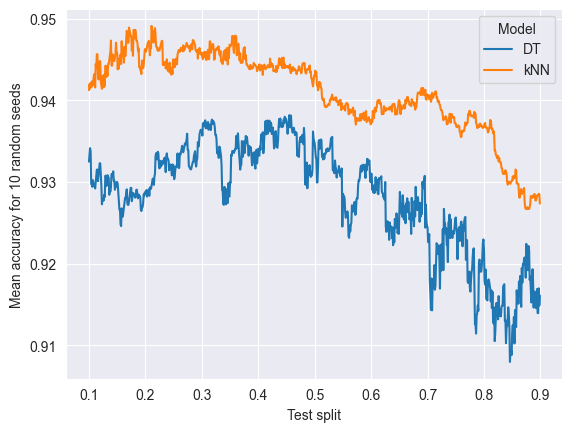

In [ ]:
# Data frames have a plot() method that can sometimes be useful... this is one
# of those times
ax = df_pivot.plot()

# Customize the returned axes a little bit
ax.set_xlabel("Test split")
ax.set_ylabel("Mean accuracy for 10 random seeds")

For this particular case, the Pokémon dataset, the $k$-Nearest Neighbors
classifier has higher accuracy the Decision Tree classifier over.

While the accuracy for $k$NN peaks at about $0.2$ (80% train, 20%
test split), the top accuracy for DT happens at about $0.45$. In practice, if
you look at the $y$-axis scale, accuracy doesn't change much between the $0.10$
and $0.45$ split interval.